# Imports e carregamento dos dados

In [5]:
#https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [6]:
# Dados fornecidos
itens = ['Coffee', 'Tea', 'Sandwich', 'Salad', 'Cake', 'Cookie', 'Smoothie', 'Juice']
prices = [2, 1.5, 4, 5, 3, 1, 4, 3]

# Carregamento do DataFrame
df = pd.read_csv("dirty_cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


# Informações iniciais sobre o Data Frame


In [7]:
# Informaçõs do Dataframe

## Dimensões do data frame
print(f"Número de linhas e colunas: {df.shape} \n")

## Tipos de dados
print(df.dtypes)

Número de linhas e colunas: (10000, 8) 

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [8]:
# Verificando os valores assumidos por cada variável
print(f"Item: {df['Item'].unique()} \n")

print(f"Quantity: {df['Quantity'].unique()} \n")

print(f"Price Per Unit: {df['Price Per Unit'].unique()} \n")

print(f"Total Spent: {df['Total Spent'].unique()} \n")

print(f"Payment Method: {df['Payment Method'].unique()} \n")

print(f"Location: {df['Location'].unique()} \n")

# print(f"Transaction Date: {df['Transaction Date'].unique()} \n")

Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea'] 

Quantity: ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan] 

Price Per Unit: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN'] 

Total Spent: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5'] 

Payment Method: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan] 

Location: ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR'] 



# Funções

## Gráficos - frequência e dados ausentes

In [9]:
# Frequência dos dados

def absolut_frequncy(df, columns, colors = []):
  """
  Função para gerar gráficos de frequência absoluta.

  Args:
    df (DataFrame): DataFrame;
    columns (list): Nome das colunas analisadas para obtenção da frequência absoluta;
    colors (list): Lista de cores para os gráficos.
  """

  for i, var in enumerate(columns):

    # Tabela de frequência absoluta
    absfr = df[var].value_counts()

    # Excluindo linhas inúteis
    absfr = absfr.drop(['ERROR', "UNKNOWN"])

    # Configurações do gráfico
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    absfr.plot(kind = 'bar', color = colors[i], zorder = 2)
    plt.xticks(rotation=45)
    plt.title(f"Frequência absoluta da variável '{var}'")
    plt.grid(alpha = 0.4)
    plt.show()
    plt.close()

In [10]:
def data_types_graph(df, columns, search = ["ERROR", "UNKNOWN"]):
  """
  Função que gera um gráfico informando a quantidade relativa de dados válidos
  e inválidos nas colunas parâmetro.

  Args:
  df (DataFrame): Dataframe;
  columns (list): Lista de colunas a serem analisadas pela função;
  search (list): Lista de dados a serem analisados.
  """

  for var in columns:
    # Tabela com os dados inválidos "Error" e "Unknown"
    datatypes = df[var].value_counts().loc[search]

    # Adicionando as quantidades de dados válidos e dados NA
    datatypes.loc[len(datatypes)] = df[var].isna().sum()
    datatypes.loc[len(datatypes)] = df[var].shape[0] - datatypes.sum()

    # Definindo os Index com os nomes dos tipos de dados
    datatypes.index = search + ["Na", "Dados válidos"]

    x = datatypes.index.tolist()
    y = datatypes.values

    # Configurações do Gráfico
    fig, ax = plt.subplots()

    colors = ['#0057b7', '#3d3d3d', '#d3d3d3', '#f4a900']

    ax.pie(y, labels = x, colors=colors,
          wedgeprops={'edgecolor': 'white', 'linewidth': 2}, pctdistance=0.8)

    circle = plt.Circle((0,0), 0.5, color='white')
    ax.add_artist(circle)

    plt.title(f"Tipos de dados da variável '{var}'", fontsize=14, fontweight='bold')
    plt.legend([f"{n}%" for n in (datatypes.values/100).round(2)],
              loc="center left", bbox_to_anchor=(1.2, 0.8))
    plt.show()
    plt.close()

## Tratamento de dado

In [11]:
def repair_data_item_price(df):
  """
  Função que realiza o reparo dos dados através da relação item-preço_unitário e
  preço_unitário-item.

  Args:
    df (DataFrame): Dataframe.
  """
  # Itens que possuem preços unitários iguais
  itens_reapts = ['Sandwich', 'Cake', 'Smoothie', 'Juice']

  # Reparando os dados via relação item-preço_unitário
  for price, item in zip(prices, itens):

    # Definindo os preços pelos nomes
    df.loc[(df['Item'] == item), 'Price Per Unit'] = price

    # Definindo os nomes pelo preço
    df.loc[(df['Price Per Unit'] == price) & (~df['Item'].isin(itens_reapts)), 'Item'] = item

In [12]:
def repair_data_quantity_price_total(df):
  """
  Função que realiza o reparo dos dados através da relação matemática entre quantidade
  preço unitário e total gasto.

  Args:
    df (DataFrame): Dataframe.
  """

  # Função que busca linhas no data frame, das quais duas das três colunas analisadas
  # possuam dados válidos e a restante, um dado inválido, conforme as ordem dos parâmetros.
  f = lambda x, y, z, colname: df.loc[(df[x].notna()) & (df[y].isna()) & (df[z].notna()), colname]

  # Neste loop, caminhamos por toda combinações da função 'f', preenchendo os dados conforme
  # a relação matemática.
  for x, y, z in zip(
      ['Total Spent', 'Total Spent', 'Price Per Unit'],
      ['Quantity', 'Price Per Unit', 'Total Spent'],
      ['Price Per Unit', 'Quantity', 'Quantity']):

    if y == 'Total Spent':
      df.loc[(df[x].notna()) & (df[y].isna()) & (df[z].notna()), y] = f(x, y, z, x)*f(x, y, z, z)
    elif y == 'Quantity':
      df.loc[(df[x].notna()) & (df[y].isna()) & (df[z].notna()), y] = f(x, y, z, x)/f(x, y, z, z)
    elif y == 'Price Per Unit':
      df.loc[(df[x].notna()) & (df[y].isna()) & (df[z].notna()), y] = f(x, y, z, x)/f(x, y, z, z)

In [13]:
def data_repair(df):
  """
  Função que resolve o problema de dependência ciclíca na imputação dos dados.

  Args:
    df (DataFrame): Dataframe.
  """

  # Função que busca linhas no data frame
  g = lambda x, y, z: df.loc[(df[x].notna()) & (df[y].isna()) & (df[z].notna())]

  # count = 1

  # Aqui, no while, há a verificação das linhas que estão nas condições de serem
  # reparadas pelas funções 'repair_Data_quantity_price_total' e 'repair_data_item_price'.
  # Caso ainda existam, as funções de reparo continuaram rodando.
  while (g('Price Per Unit', 'Quantity', 'Total Spent').shape[0] > 0) or (g('Price Per Unit', 'Total Spent', 'Quantity').shape[0] > 0) or (g('Quantity', 'Price Per Unit', 'Total Spent').shape[0] > 0) or (df[(df['Item'].isna()) & (df['Quantity'].notna()) & (df['Total Spent'].notna())].shape[0] > 0):
    # print(count)
    repair_data_quantity_price_total(df)
    repair_data_item_price(df)
    # count += 1

  return "Dados reparados com sucesso!"

# Execução do código

## Estatísticas dos dados faltantes

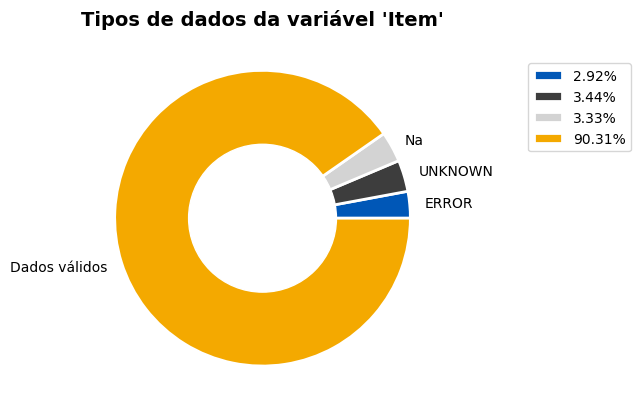

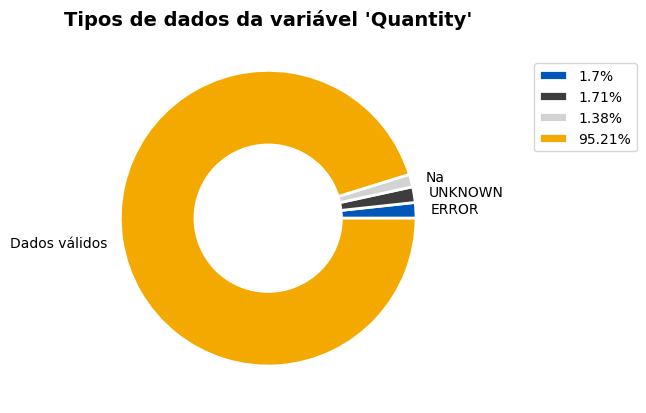

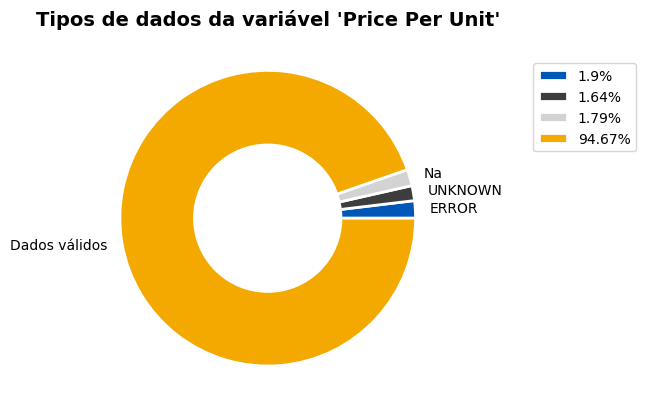

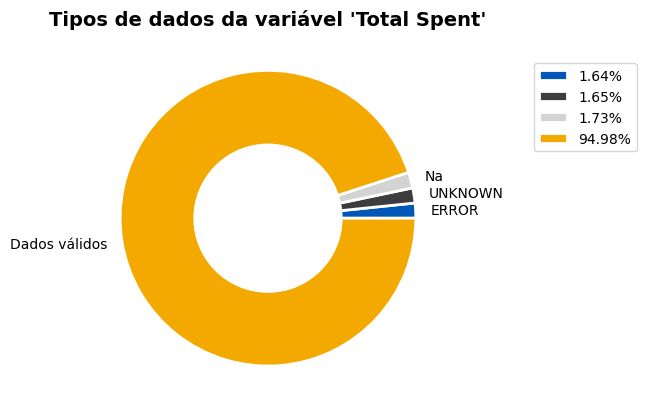

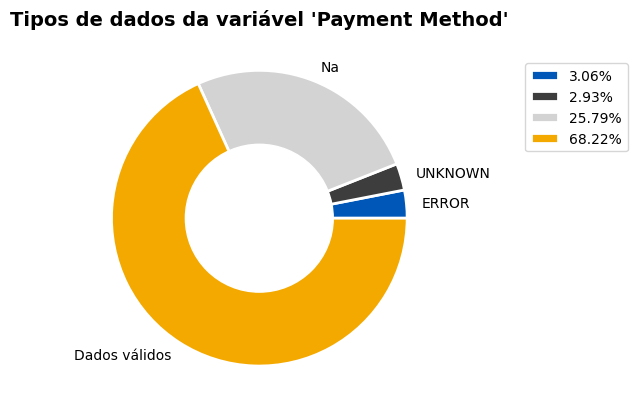

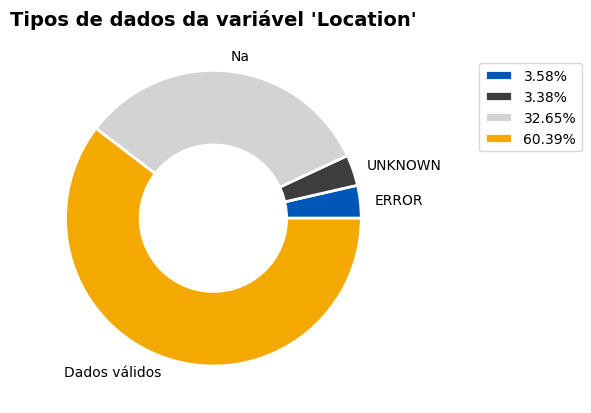

In [145]:
###### CHAMADA DE FUNÇÃO

# Lista com os nomes de todas as colunas
columns = df.columns.to_list()

# Removendo as colunas que não queremos gráifcos
columns.remove('Transaction ID')
columns.remove('Transaction Date')

data_types_graph(df, columns)

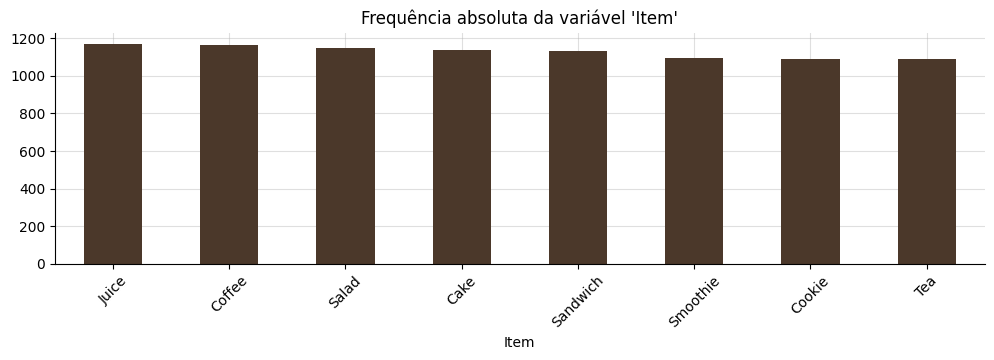

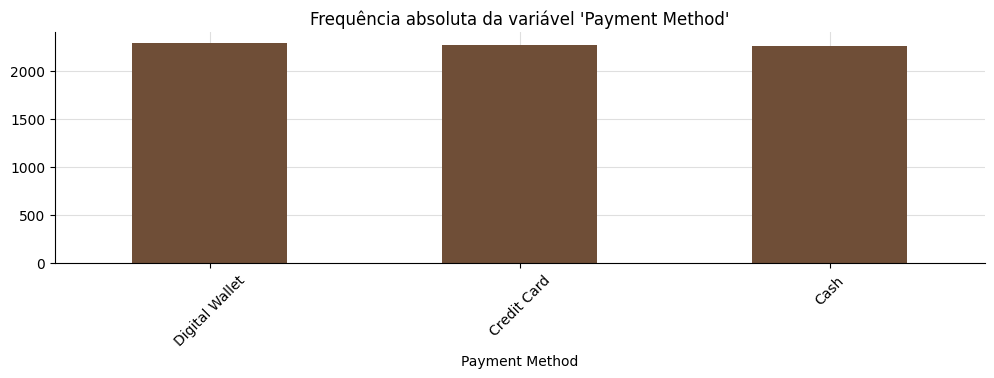

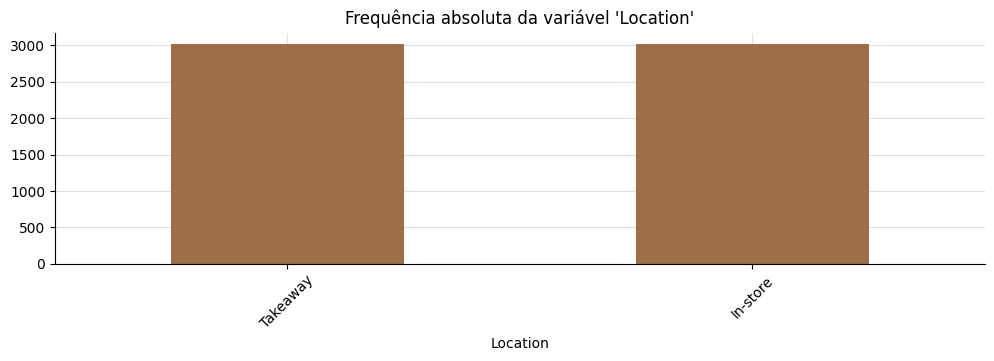

In [146]:
##### CHAMADA DE FUNÇÃO

# Lista com os nomes de todas as colunas
columns = df.columns.to_list()

# Removendo as colunas que não queremos gráifcos
columns.remove('Transaction ID')
columns.remove('Transaction Date')
columns.remove('Quantity')
columns.remove('Price Per Unit')
columns.remove('Total Spent')

cores_cafe = ['#4B382A', '#6F4E37', '#9C6F4A', '#C19A6B', '#D2B48C', '#E3CBA8', '#F3E5D8']

absolut_frequncy(df, columns, cores_cafe)

## Tratamento e transformação dos dados

In [14]:
# Não há duplicatas
df[df.duplicated()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [15]:
# Alteração dos dados de natureza numérica str --> int or float
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
# Mudança do tipo de dado da data da transação
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
print("Dados tranformados.")

Dados tranformados.


In [16]:
data_repair(df)

'Dados reparados com sucesso!'

## Estatísticas dos dados faltantes - pós tratamento

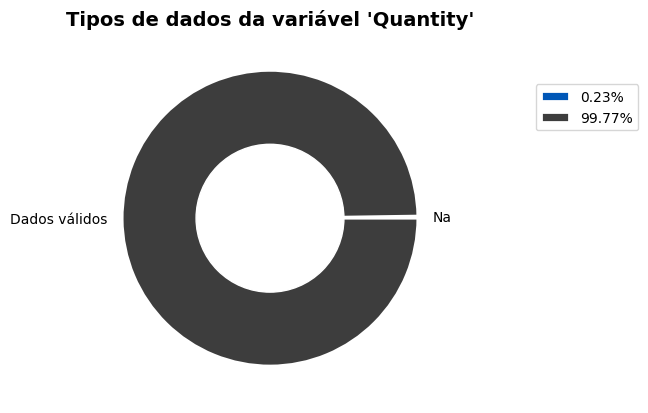

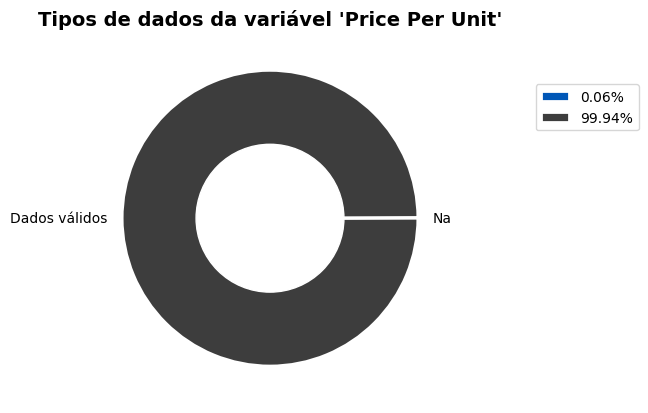

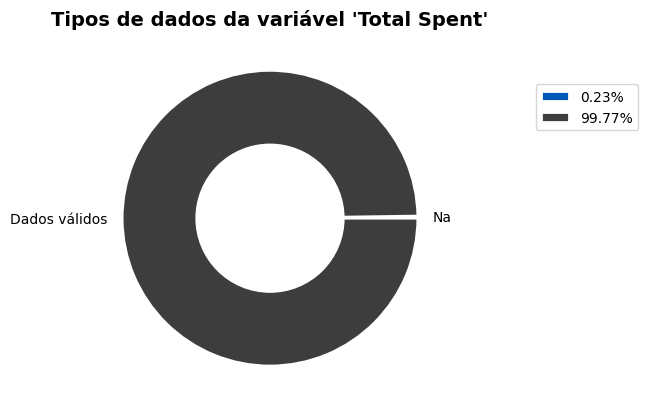

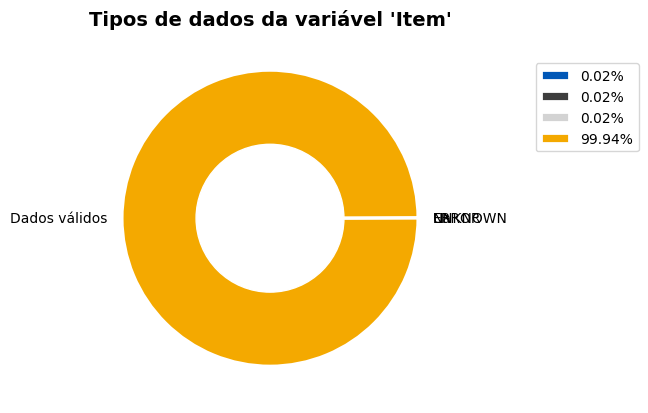

In [150]:
###### Pós reparo dos dados

# Lista com os nomes de todas as colunas
columns = ['Quantity', 'Price Per Unit', 'Total Spent']

data_types_graph(df, columns, [])
data_types_graph(df, ['Item'])

## Análises e estatísticas

In [28]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9977.000000,9994.000000,9977.000000,9540
mean,3.024957,2.947018,8.930139,2023-07-01 23:00:31.698113280
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.420395,1.280006,6.004921,NaN


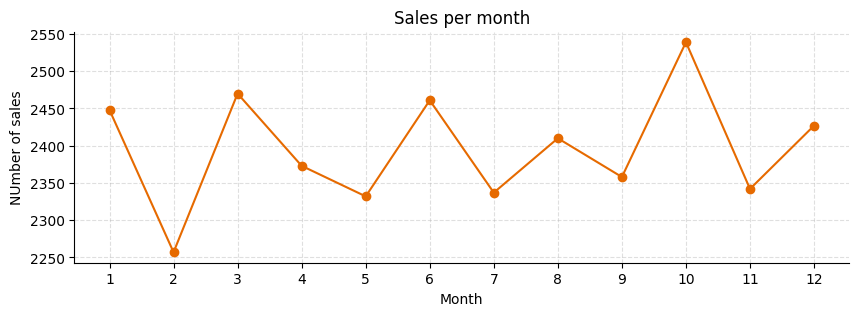

In [91]:
####### QUANTIDADE DE VENDAS POR MÊS

venda_mes = []
meses = np.arange(1, 13)

# Coletando o valor total de vendas por mês (independe do produto)
for mes in meses:
  venda_mes.append(df.loc[df['Transaction Date'].dt.month == mes, 'Quantity'].sum())

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 3))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(alpha=0.4, linestyle = '--')
ax.plot(
    meses,
    venda_mes,
    zorder = 2,
    marker ='o',
    linestyle = '-',
    color = '#E66A00')
plt.xticks(meses)
plt.xlabel('Month')
plt.ylabel('NUmber of sales')
plt.title('Sales per month')
plt.show()
plt.close()

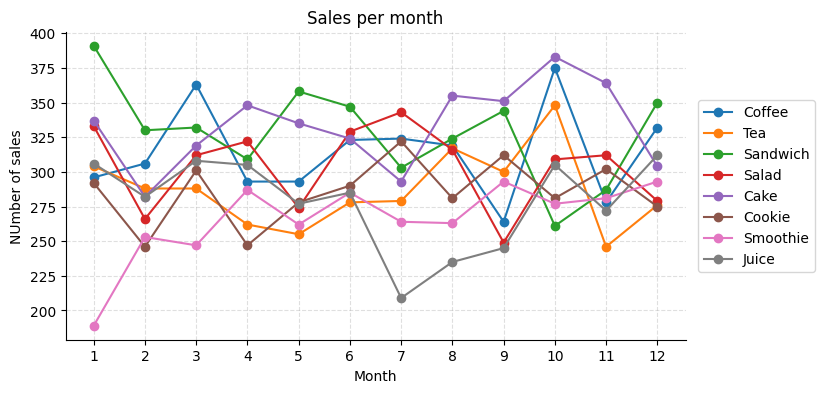

In [153]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(alpha=0.4, linestyle = '--')

qtd_per_month = []
for item in itens:
  for mes in meses:
    qtd = df.loc[(df['Item'] == item) & (df['Transaction Date'].dt.month == mes), 'Quantity'].sum()
    qtd_per_month.append(qtd)

  ax.plot(
      meses,
      qtd_per_month,
      marker = 'o',
      zorder = 2,
      linestyle = '-',
      label = item)
  qtd_per_month = []

plt.legend(loc = 'upper right', bbox_to_anchor=(1.22, 0.8))
plt.xlabel('Month')
plt.ylabel('NUmber of sales')
plt.title('Sales per month')
plt.xticks(meses)
plt.show()
plt.close()

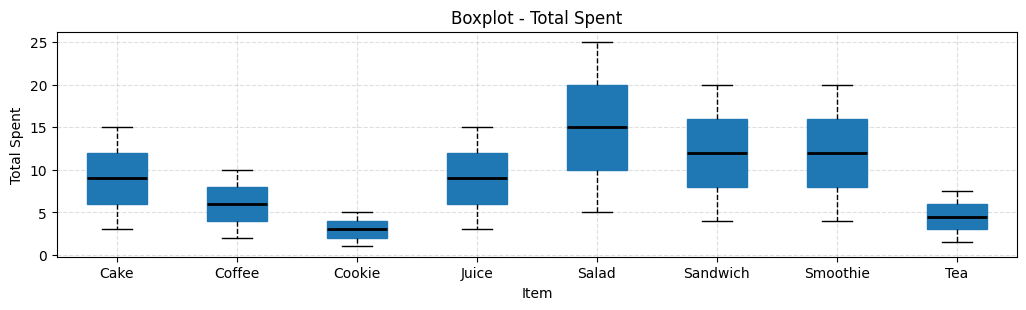

In [154]:
df_filter =  df[~df['Item'].isin(['UNKNOWN', 'ERROR'])]
df_filter.boxplot(column = 'Total Spent', by = 'Item', figsize = (12, 3),
  patch_artist=True,
  boxprops=dict(facecolor="#1F77B4", color="#1F77B4"),
  whiskerprops=dict(color="black", linestyle="--"),
  capprops=dict(color="black"),
  medianprops=dict(color="black", linewidth=2))

plt.grid(alpha = 0.4, linestyle='--')
plt.title("Boxplot - Total Spent")
plt.ylabel("Total Spent")
plt.suptitle("")  # Remove o título padrão gerado por pandas
plt.show()
plt.close()

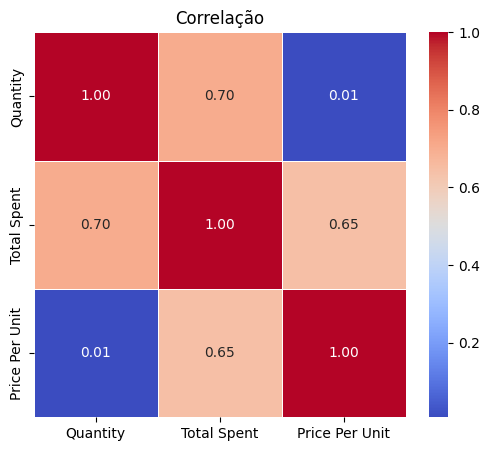

In [155]:
### Gráficos de dispersão

# plt.scatter( df['Total Spent'], df['Quantity'])

matrix_corr = df[['Quantity', 'Total Spent', 'Price Per Unit']].corr()
# Criando um heatmap
plt.figure(figsize=(6,5))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação")
plt.show()

In [156]:
df_filter =  df[(~df['Item'].isin(['UNKNOWN', 'ERROR'])) & (~df['Payment Method'].isin(['UNKNOWN', 'ERROR']))]
item_payment = pd.crosstab(df_filter['Item'], df_filter['Payment Method'])

# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(item_payment)

# Exibindo os resultados
print(f"Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:")
print(expected)

Qui-Quadrado: 11.1592
p-valor: 0.6735
Graus de liberdade: 14
Frequências esperadas:
[[311.92784866 313.72371315 316.34843819]
 [276.82768734 278.42146942 280.75084323]
 [279.47675612 281.08578971 283.43745417]
 [273.84748497 275.42410911 277.72840592]
 [296.69570318 298.40387154 300.90042528]
 [306.9608447  308.72811263 311.31104267]
 [246.0322628  247.44874615 249.51899105]
 [266.23141223 267.7641883  270.00439947]]


In [157]:
df_filter =  df[(~df['Location'].isin(['UNKNOWN', 'ERROR'])) & (~df['Payment Method'].isin(['UNKNOWN', 'ERROR']))]
location_payment = pd.crosstab(df_filter['Location'], df_filter ['Payment Method'])

# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(location_payment)

# Exibindo os resultados
print(f"Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:")
print(expected)

Qui-Quadrado: 2.8320
p-valor: 0.2427
Graus de liberdade: 2
Frequências esperadas:
[[683.16438026 675.16245487 719.67316486]
 [682.83561974 674.83754513 719.32683514]]


In [159]:
df_filter =  df[(~df['Item'].isin(['UNKNOWN', 'ERROR'])) & (~df['Location'].isin(['UNKNOWN', 'ERROR']))]
item_location = pd.crosstab(df_filter['Item'], df_filter ['Location'])

# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(item_location)

# Exibindo os resultados
print(f"Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:")
print(expected)

Qui-Quadrado: 6.5343
p-valor: 0.4789
Graus de liberdade: 7
Frequências esperadas:
[[408.95725646 410.04274354]
 [373.50430749 374.49569251]
 [386.98641484 388.01358516]
 [350.53479125 351.46520875]
 [391.48045063 392.51954937]
 [421.94002651 423.05997349]
 [312.58515573 313.41484427]
 [368.01159708 368.98840292]]


# O que não fazer

In [ ]:
# Preencher com isto torna os dados inconcistentes !!!!!!!!!!!
df[df['Quantity'].isna()] = df['Quantity'].median()
df[df['Price Per Unit'].isna()] = df['Price Per Unit'].median()
df[df['Total Spent'].isna()] = df['Total Spent'].median()

In [20]:
len(df[df['Quantity'].isna()])
df[df['Price Per Unit'].isna()]
df[df['Total Spent'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2289,TXN_7524977,UNKNOWN,4.0,NaN,NaN,ERROR,NaN,2023-12-09
2796,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25
